In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing(data_home="../data",as_frame=True)

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
housingData = housing.data
housingLabels = housing.target

In [5]:
housingLabels.shape

(20640,)

In [6]:
housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
housingData['income_cat'] = pd.cut(housingData['MedInc'],
                               bins=[0., 1.5, 3.0, 4.5, 6.,	np.inf],
                               labels=[1, 2, 3, 4, 5])
strated_train,strated_test,y_train,y_test = train_test_split(housingData,housingLabels,test_size=0.2,
                                                      random_state=42,stratify=housingData['income_cat'])

for set_ in (strated_train,strated_test):
    set_.drop('income_cat',axis=1,inplace=True)


In [11]:
housing = strated_train.copy()
housing['MedHouseVal'] = y_train.copy()

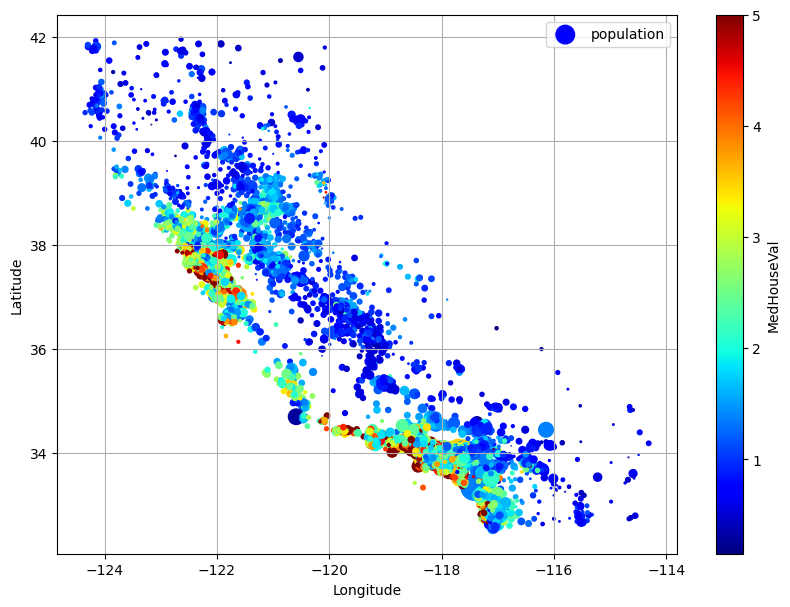

In [12]:
housing.plot(kind='scatter',x='Longitude',y='Latitude',grid=True,
             s=housing["Population"]/100,label="population",
             c="MedHouseVal",cmap="jet",colorbar=True,legend=True,
             sharex=False,figsize=(10,7))
plt.show()

In [13]:
# Standard correlation coefficient (Pearson's)
corr_mat = housing.corr()
corr_mat["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.687151
AveRooms       0.146255
HouseAge       0.114146
AveOccup      -0.021991
Population    -0.026882
AveBedrms     -0.043294
Longitude     -0.047466
Latitude      -0.142673
Name: MedHouseVal, dtype: float64

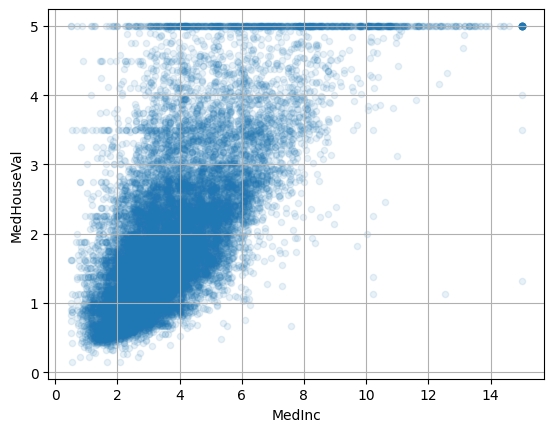

In [14]:
housing.plot(kind="scatter",x="MedInc",y="MedHouseVal",alpha=0.1,grid=True)
plt.show()

In [15]:
housing = strated_train.copy()
housing_labels = y_train.copy()
housing.columns =  ["median_income","housing_median_age","rooms_per_house",
                    "bedrooms_ratio","population","people_per_house",
                    "latitude","longitude"]
housing_labels.columns = ["median_house_value"]

housing_test = strated_test.copy()
housing_test_labels = y_test.copy()
housing_test.columns = housing.columns
housing_test_labels.columns = housing_labels.columns

Standarization -> (x-μ)/σ -> new μ = 0 and new σ = 1 , doesn't have problems with outliers but doesn't restrict the range of values neither
Normailization -> min-max -> (0,1) or (-1,1) -> restricts the range of values but have problems with outliers
Case oh heavy tails -> raising the feature to a power between 0 and 1 or taking logarithms may help
Bucketizing into roughly equal-sized buckets -> buckets id's could be treated as numerical or categorical
Similarity meassure -> With multimodal features, we can create features for each (at least the main) modes, wich values are the similarity of the meassured value to the corresponding mode e.g. using RBF (radial basis function)

Transformed Target Regressor -> When I want to apply some type of standarization to the labels, this Class take as arguments the an untrained model, and the transformer for the labels. It makes automatically the call to the inverse_transform of the Scaler when predict is called.

Posibility of making customs transformer (with inverse function) with FunctionTransformer, and also to create trainable transformers with fit and transform methods by creating classes and using herency of some base classes (BaseEstimator,TransformerMixin,...)

If there are more than one transformation to do, a PipeLine (or make_pipeline) could be useful. It creates a concatenation of estimators in wich all of them must be transformers except for the last one.

It's also possibly to apply different pipes dividing the data by columns, using ColumnTransformer. Useful for example when I want to apply different transformations to numerical attributes, and other to the categorical ones.


array([[<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'rooms_per_house'}>],
       [<Axes: title={'center': 'bedrooms_ratio'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'people_per_house'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

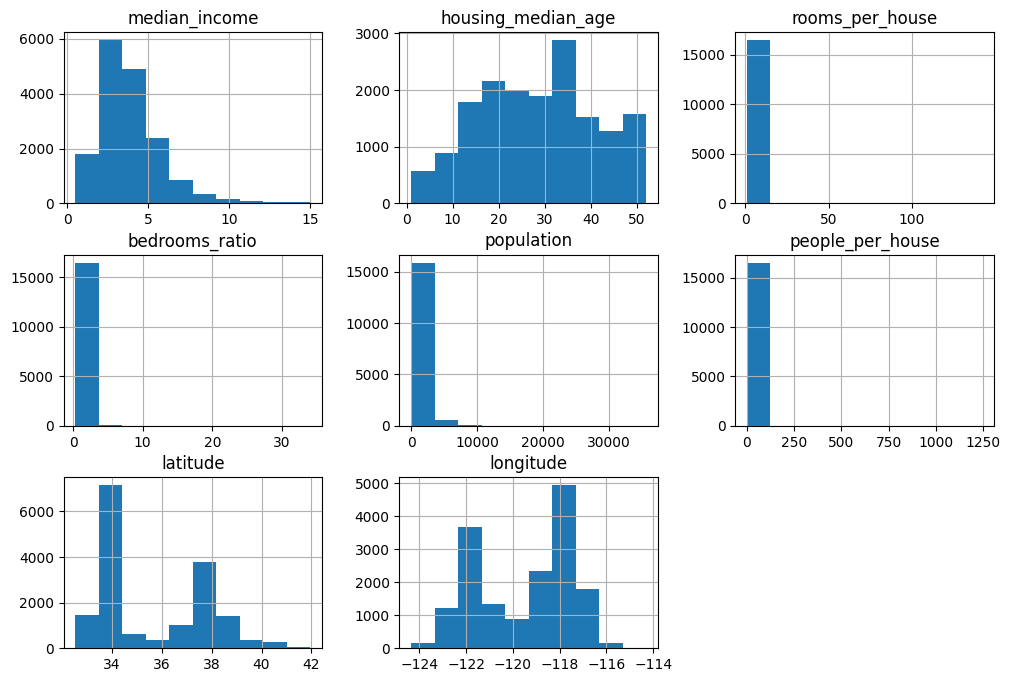

In [16]:
housing.hist(figsize=(12,8))

In [17]:
log_columns = ['median_income','rooms_per_house','bedrooms_ratio','population','people_per_house']
standard_columns = ['housing_median_age','latitude','longitude']

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer,StandardScaler

log_standard_pipe = Pipeline([('log',FunctionTransformer(func=np.log,inverse_func=np.exp)),
                         ('standard',StandardScaler())])
preprocess = ColumnTransformer([('log_standard',log_standard_pipe,log_columns),
                               ('standards',StandardScaler(),standard_columns)])
housing_transformed = pd.DataFrame(preprocess.fit_transform(housing),columns=housing.columns)

array([[<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'rooms_per_house'}>],
       [<Axes: title={'center': 'bedrooms_ratio'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'people_per_house'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

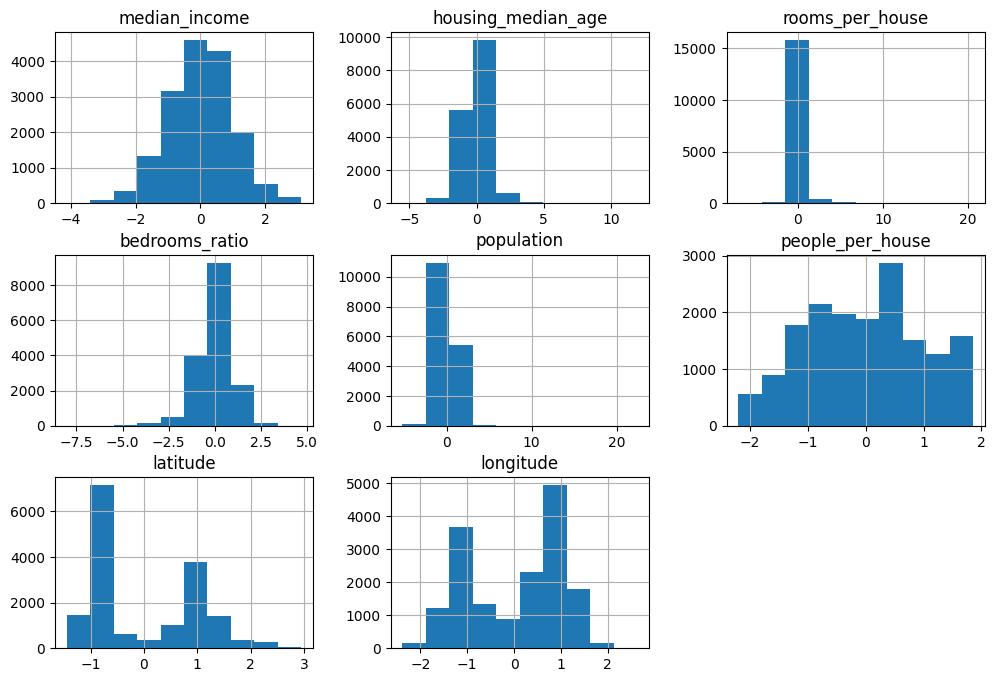

In [18]:
housing_transformed.hist(figsize=(12,8))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_transformed,y_train)
#housing_test_transformed = pd.DataFrame(preprocess.fit_transform(housing_test),columns=housing.columns)
housing_predictions = lin_reg.predict(housing_transformed)
lin_rmse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse

0.5225573298382713

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_transformed,y_train)
housing_tree_predictions = tree_reg.predict(housing_transformed)
tree_rmse = mean_squared_error(housing_labels,housing_tree_predictions)
tree_rmse

7.835101045073034e-32

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(rf_reg,housing_transformed,housing_labels,
                                scoring="neg_root_mean_squared_error",cv=10)
forest_rmses

array([0.54199522, 0.4983898 , 0.46592239, 0.52197532, 0.47894769,
       0.51989574, 0.54182639, 0.5024918 , 0.48491409, 0.5399085 ])